In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding and Exploration

In [3]:
# Reading the dataset

dataset = pd.read_csv('day.csv')
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dataset.isnull().sum(axis = 0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Decoding the data
### Assigning string values to different seasons instead of numeric values

In [8]:
# 1 => Winter
dataset.loc[(dataset['season'] == 1), 'season'] = 'Winter'
# 2 => Spring
dataset.loc[(dataset['season'] == 2), 'season'] = 'Spring'
# 3 => Summer
dataset.loc[(dataset['season'] == 3), 'season'] = 'Summer'
# 4 => Fall
dataset.loc[(dataset['season'] == 4), 'season'] = 'Fall'
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [9]:
dataset['season'].astype("category").value_counts()

Summer    188
Spring    184
Winter    180
Fall      178
Name: season, dtype: int64

In [10]:
dataset['yr'].astype("category").value_counts()

0    365
1    365
Name: yr, dtype: int64

In [11]:
def object_map_mnths(x):
    return x.map({1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August',
                 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'})

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,1,December,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,1,December,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,1,December,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,1,December,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [12]:
dataset['mnth'].astype('category').value_counts()

August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     56
Name: mnth, dtype: int64

In [13]:
dataset['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [14]:
dataset['weekday'].astype('category').value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [15]:
dataset.loc[(dataset['yr'] == 0), 'yr'] = '2018'
dataset.loc[(dataset['yr'] == 1), 'yr'] = '2019'

In [16]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,2018,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,2018,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,2018,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,2018,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,2018,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,2019,December,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,2019,December,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,2019,December,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,2019,December,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [17]:
dataset.loc[(dataset['holiday'] == 0), 'holiday'] = 'No'
dataset.loc[(dataset['holiday'] == 1), 'holiday'] = 'Yes'
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,2018,January,No,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,2018,January,No,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,2018,January,No,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,2018,January,No,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,2018,January,No,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,2019,December,No,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,2019,December,No,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,2019,December,No,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,2019,December,No,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [18]:
dataset.loc[(dataset['workingday'] == 0), 'workingday'] = 'No'
dataset.loc[(dataset['workingday'] == 1), 'workingday'] = 'Yes'
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,2018,January,No,1,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,2018,January,No,2,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,2018,January,No,3,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,2018,January,No,4,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,2018,January,No,5,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,2019,December,No,5,Yes,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,2019,December,No,6,No,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,2019,December,No,0,No,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,2019,December,No,1,Yes,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [19]:
dataset.loc[(dataset['weekday'] == 0), 'weekday'] = 'Monday'
dataset.loc[(dataset['weekday'] == 1), 'weekday'] = 'Tuesday'
dataset.loc[(dataset['weekday'] == 2), 'weekday'] = 'Wednesday'
dataset.loc[(dataset['weekday'] == 3), 'weekday'] = 'Thursday'
dataset.loc[(dataset['weekday'] == 4), 'weekday'] = 'Friday'
dataset.loc[(dataset['weekday'] == 5), 'weekday'] = 'Saturday'
dataset.loc[(dataset['weekday'] == 6), 'weekday'] = 'Sunday'
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,2018,January,No,Tuesday,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,2018,January,No,Wednesday,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,2018,January,No,Thursday,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,2018,January,No,Friday,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,2018,January,No,Saturday,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,2019,December,No,Saturday,Yes,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,2019,December,No,Sunday,No,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,2019,December,No,Monday,No,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,2019,December,No,Tuesday,Yes,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [20]:
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'Clear, Partly Cloudy'
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'Cloudy, Mist'
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'Rain, Snow'
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,2018,January,No,Tuesday,Yes,"Cloudy, Mist",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,2018,January,No,Wednesday,Yes,"Cloudy, Mist",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,2018,January,No,Thursday,Yes,"Clear, Partly Cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,2018,January,No,Friday,Yes,"Clear, Partly Cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,2018,January,No,Saturday,Yes,"Clear, Partly Cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,2019,December,No,Saturday,Yes,"Cloudy, Mist",10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,2019,December,No,Sunday,No,"Cloudy, Mist",10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,2019,December,No,Monday,No,"Cloudy, Mist",10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,2019,December,No,Tuesday,Yes,"Clear, Partly Cloudy",10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [21]:
dataset['weathersit'].astype('category').value_counts()

Clear, Partly Cloudy    463
Cloudy, Mist            246
Rain, Snow               21
Name: weathersit, dtype: int64

In [22]:
dataset.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 2. Data Visualization

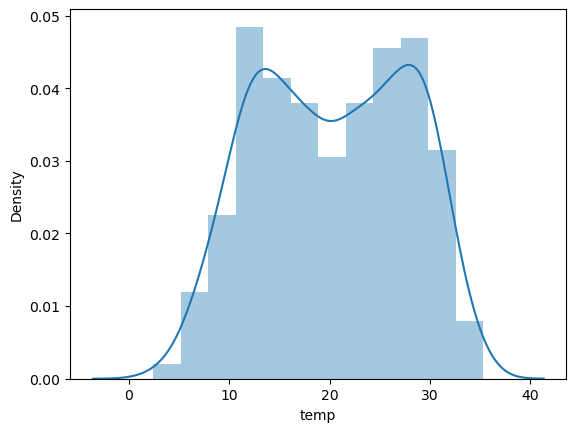

In [23]:
sns.distplot(dataset['temp'])
plt.show()

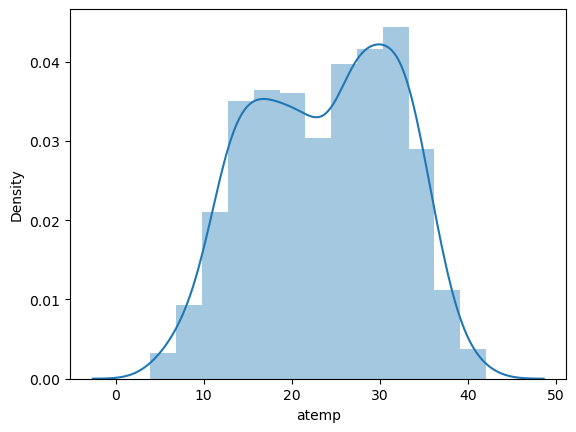

In [24]:
sns.distplot(dataset['atemp'])
plt.show()

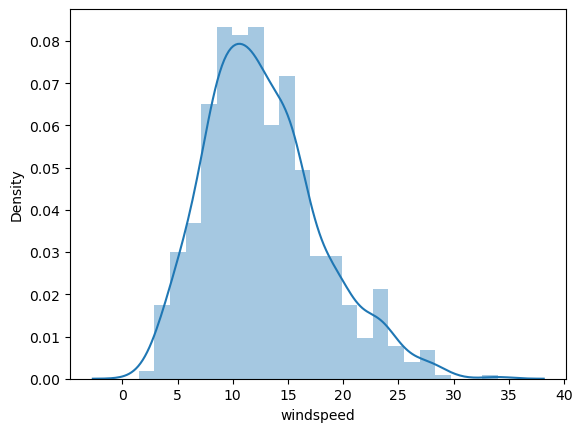

In [25]:
sns.distplot(dataset['windspeed'])
plt.show()

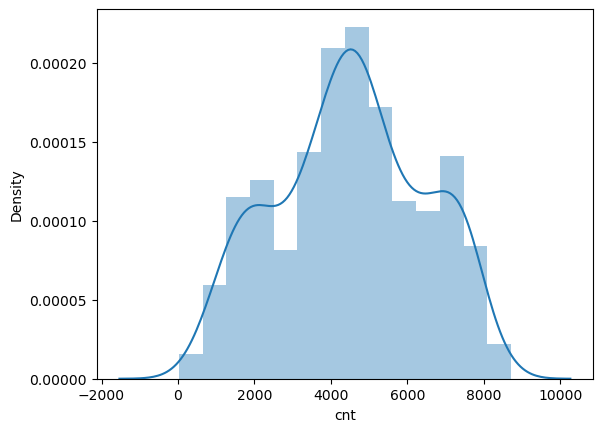

In [26]:
sns.distplot(dataset['cnt'])
plt.show()

In [27]:
dataset['dteday'] = dataset['dteday'].astype('datetime64')

In [28]:
dataset_categorical = dataset.select_dtypes(exclude = ['float64', 'datetime64', 'int64'])

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [30]:
dataset_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [31]:
dataset_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,Winter,2018,January,No,Tuesday,Yes,"Cloudy, Mist"
1,Winter,2018,January,No,Wednesday,Yes,"Cloudy, Mist"
2,Winter,2018,January,No,Thursday,Yes,"Clear, Partly Cloudy"
3,Winter,2018,January,No,Friday,Yes,"Clear, Partly Cloudy"
4,Winter,2018,January,No,Saturday,Yes,"Clear, Partly Cloudy"
...,...,...,...,...,...,...,...
725,Winter,2019,December,No,Saturday,Yes,"Cloudy, Mist"
726,Winter,2019,December,No,Sunday,No,"Cloudy, Mist"
727,Winter,2019,December,No,Monday,No,"Cloudy, Mist"
728,Winter,2019,December,No,Tuesday,Yes,"Clear, Partly Cloudy"


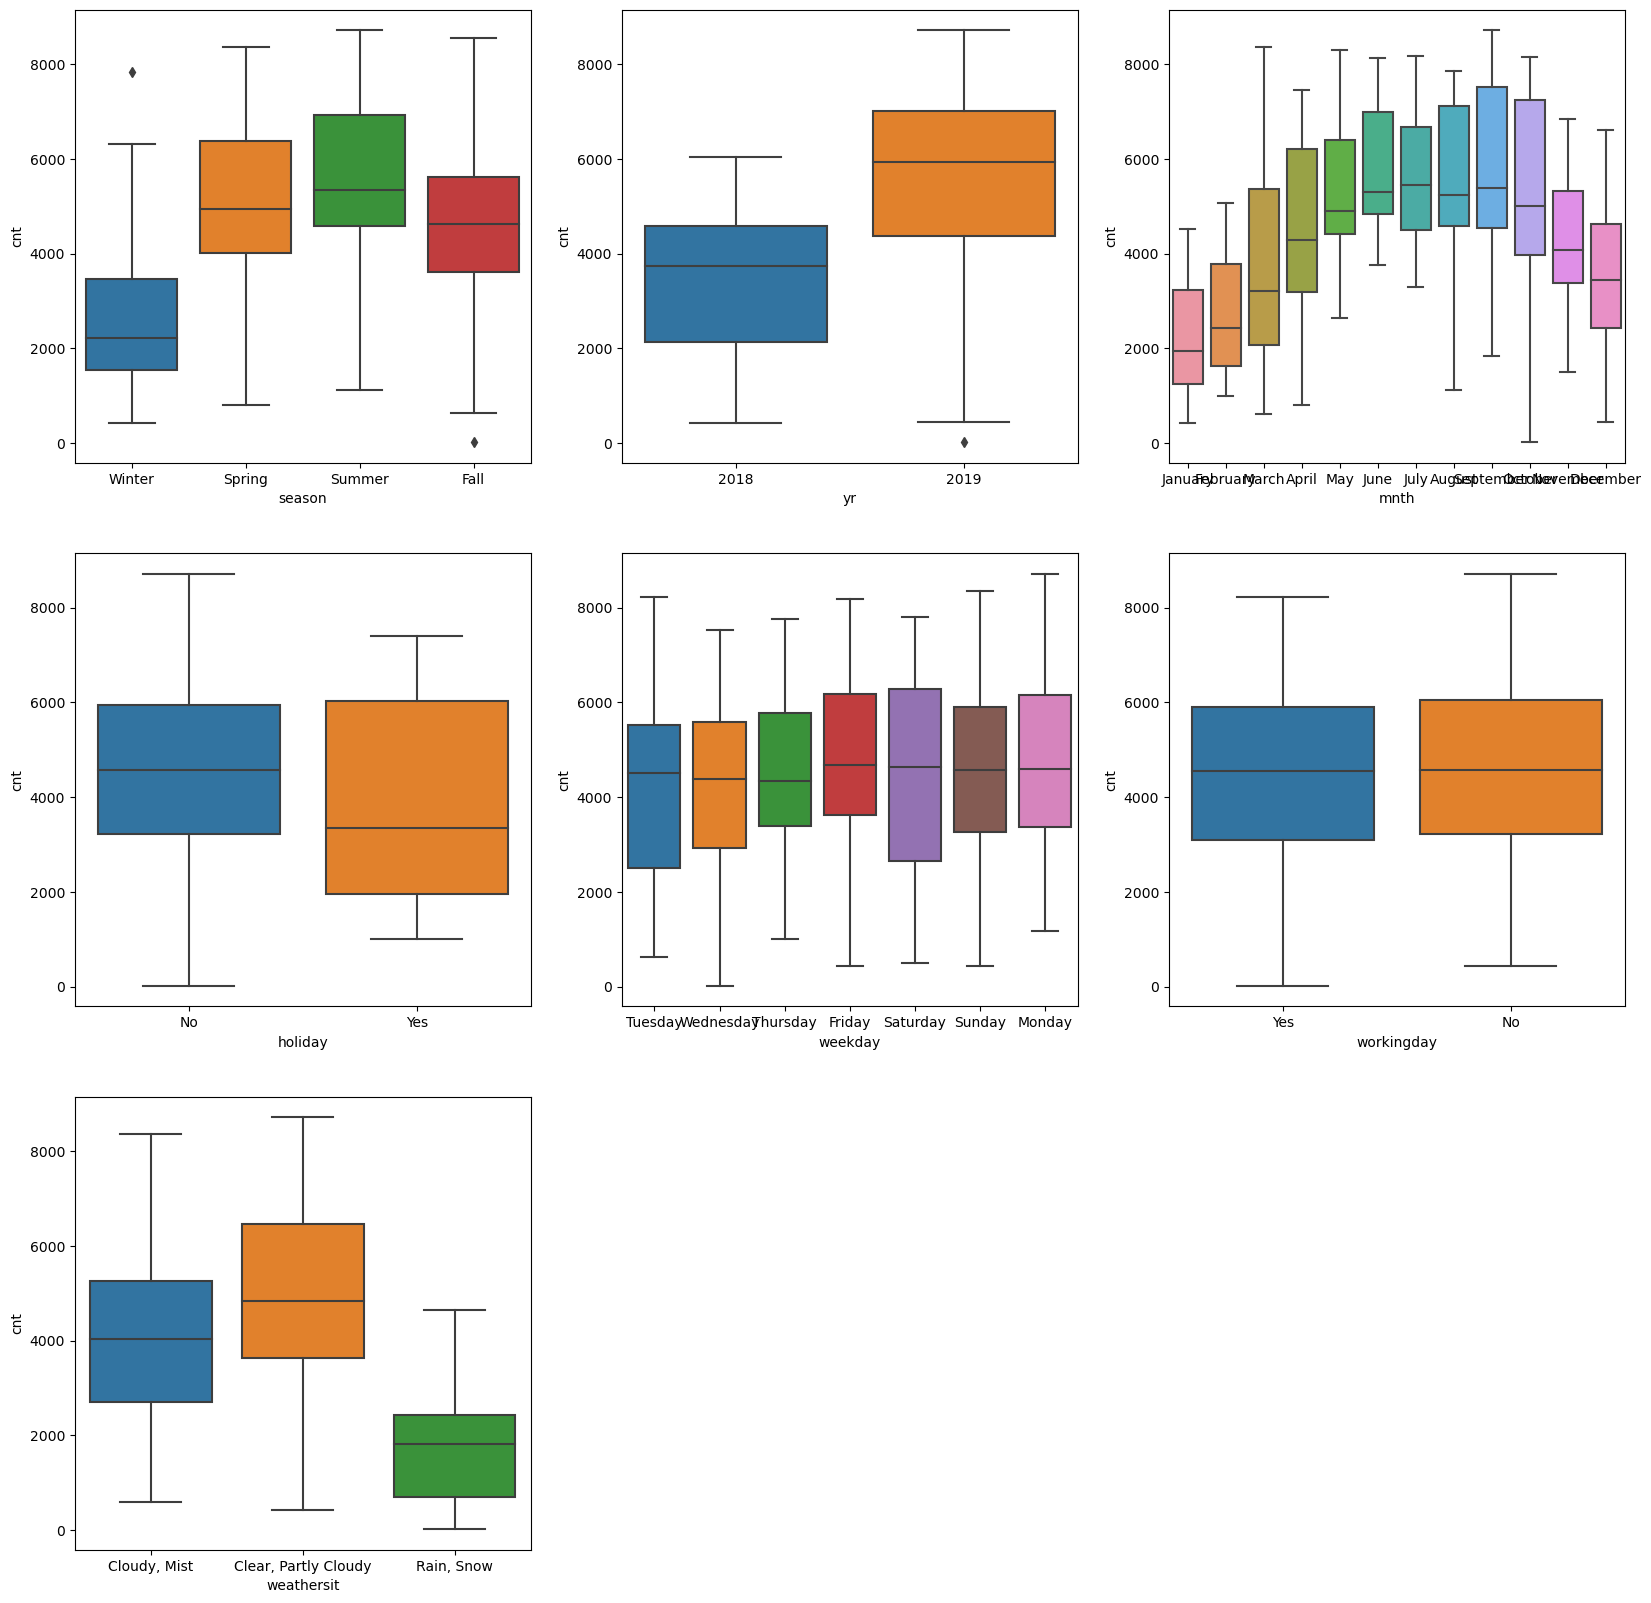

In [32]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.show()

In [33]:
intVarlist = ["casual", "registered", "cnt"]

In [34]:
for var in intVarlist:
    dataset[var] = dataset[var].astype("float")

In [35]:
dataset_numeric = dataset.select_dtypes(include = ['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


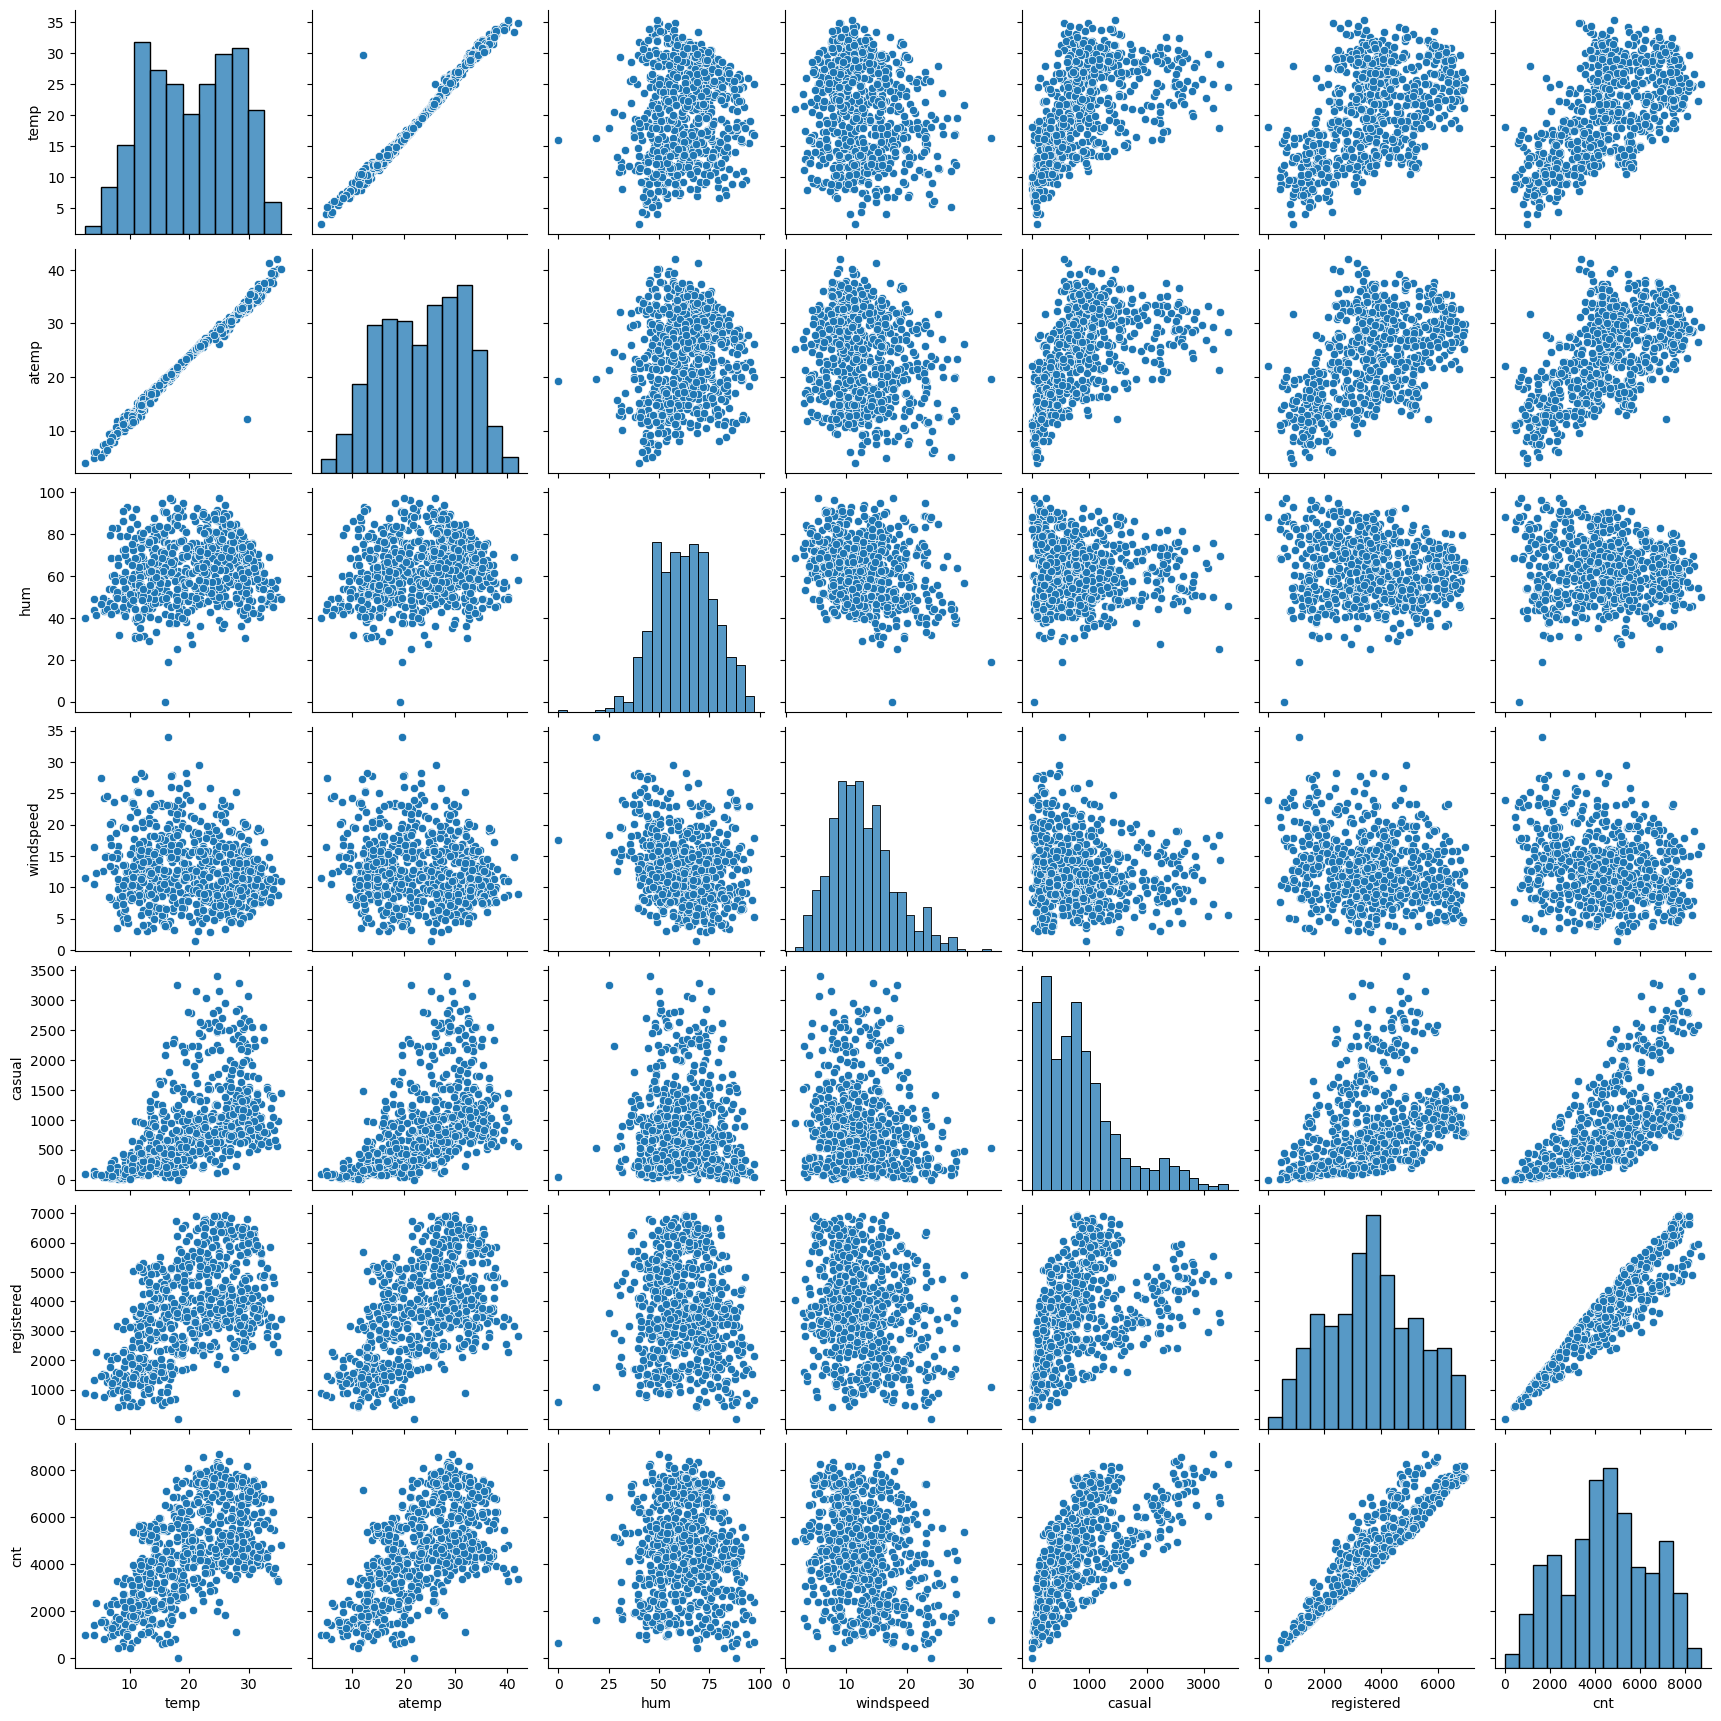

In [36]:
sns.pairplot(dataset_numeric)
plt.show()

In [37]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

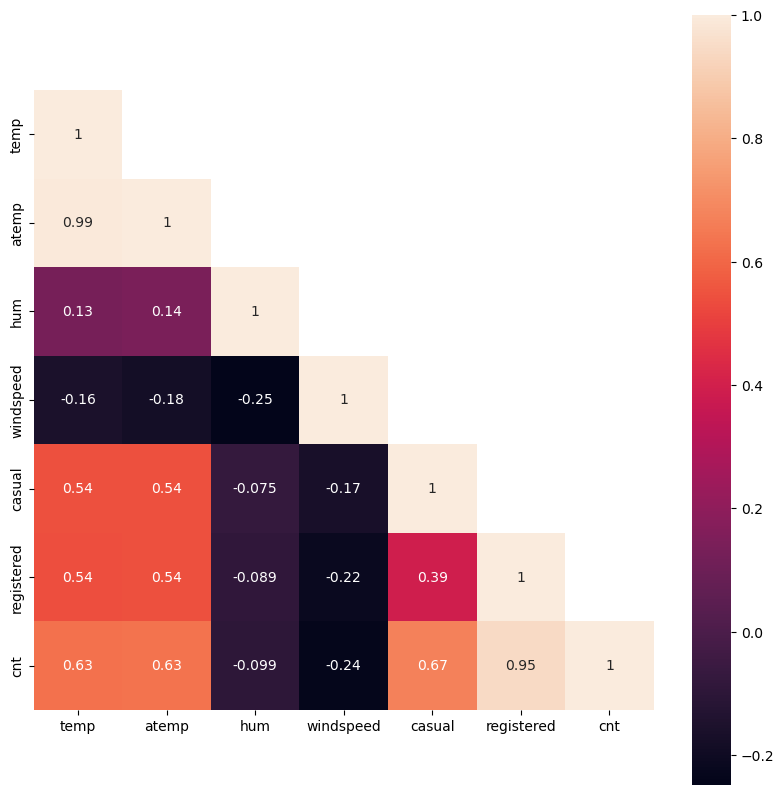

In [38]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask = mask, vmax = 1, square = True, annot = True)

In [39]:
dataset.drop('atemp', axis = 1, inplace = True)
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Winter,2018,January,No,Tuesday,Yes,"Cloudy, Mist",14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,Winter,2018,January,No,Wednesday,Yes,"Cloudy, Mist",14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,Winter,2018,January,No,Thursday,Yes,"Clear, Partly Cloudy",8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,Winter,2018,January,No,Friday,Yes,"Clear, Partly Cloudy",8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,Winter,2018,January,No,Saturday,Yes,"Clear, Partly Cloudy",9.305237,43.6957,12.522300,82.0,1518.0,1600.0


#  3. Data Preparation

In [40]:
dataset_categorical = dataset.select_dtypes(include = ['object'])
dataset_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,Winter,2018,January,No,Tuesday,Yes,"Cloudy, Mist"
1,Winter,2018,January,No,Wednesday,Yes,"Cloudy, Mist"
2,Winter,2018,January,No,Thursday,Yes,"Clear, Partly Cloudy"
3,Winter,2018,January,No,Friday,Yes,"Clear, Partly Cloudy"
4,Winter,2018,January,No,Saturday,Yes,"Clear, Partly Cloudy"
...,...,...,...,...,...,...,...
725,Winter,2019,December,No,Saturday,Yes,"Cloudy, Mist"
726,Winter,2019,December,No,Sunday,No,"Cloudy, Mist"
727,Winter,2019,December,No,Monday,No,"Cloudy, Mist"
728,Winter,2019,December,No,Tuesday,Yes,"Clear, Partly Cloudy"


In [41]:
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first = True)

In [42]:
dataset_dummies.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [43]:
dataset_dummies.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_August', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'mnth_September', 'holiday_Yes', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes',
       'weathersit_Cloudy, Mist', 'weathersit_Rain, Snow'],
      dtype='object')

In [44]:
# Drop categorical variables columns
dataset = dataset.drop(list(dataset_categorical.columns), axis = 1)

In [45]:
dataset.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [46]:
dataset = pd.concat([dataset, dataset_dummies], axis = 1)

In [47]:
dataset.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
0,1,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,2,2018-02-01,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,3,2018-03-01,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,4,2018-04-01,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [48]:
dataset.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [49]:
dataset.head()

,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
0,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


# 4. Model Building

In [50]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
np.random.seed(0)
df_train, df_test = train_test_split(dataset)

In [53]:
df_train

,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
452,20.260847,43.9167,21.416550,834.0,5299.0,6133.0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
337,13.564153,77.5833,5.625206,634.0,2851.0,3485.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
509,27.880000,74.7083,9.416850,1417.0,5317.0,6734.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
77,19.372500,37.9167,24.667189,1424.0,1693.0,3117.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
451,19.850847,48.1250,19.541957,674.0,5024.0,5698.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,15.750847,90.5417,10.584325,441.0,2787.0,3228.0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
192,32.560847,55.9167,13.417018,662.0,3596.0,4258.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
629,26.650000,64.6667,19.000061,2512.0,5883.0,8395.0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
559,28.836653,69.9167,9.626493,2355.0,4614.0,6969.0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [54]:
df_test

,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
196,28.153347,58.5000,13.958914,2418.0,3505.0,5923.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
187,30.750000,65.1250,10.666400,754.0,3838.0,4592.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
14,9.566653,49.8750,10.583521,222.0,1026.0,1248.0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
31,7.879134,82.9565,3.565271,47.0,1313.0,1360.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
390,14.008347,76.9583,4.917519,244.0,3831.0,4075.0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,16.195000,75.8750,3.834075,373.0,3662.0,4035.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
21,2.424346,40.0000,11.521990,93.0,888.0,981.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
650,16.126653,49.4583,9.791514,2252.0,4857.0,7109.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
424,19.919153,61.5417,15.208129,325.0,4665.0,4990.0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
var = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [58]:
df_train

,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
452,0.519699,0.257541,0.694652,0.256000,0.762200,0.703060,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
337,0.306231,0.726218,0.104329,0.194462,0.408750,0.398412,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
509,0.762572,0.686194,0.246070,0.435385,0.764799,0.772204,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
77,0.491382,0.174014,0.816169,0.437538,0.241554,0.356075,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
451,0.506630,0.316125,0.624574,0.206769,0.722495,0.653014,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.375936,0.906613,0.289714,0.135077,0.399509,0.368845,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
192,0.911781,0.424594,0.395608,0.203077,0.516315,0.487345,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
629,0.723364,0.546404,0.604317,0.772308,0.846520,0.963300,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
559,0.793067,0.619490,0.253907,0.724000,0.663298,0.799241,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [59]:
df_train.describe()

,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000
mean,0.516243,0.515420,0.374834,0.259335,0.525104,0.515383,0.261426,0.252285,0.241316,0.499086,...,0.029250,0.144424,0.149909,0.142596,0.133455,0.137112,0.13894,0.689214,0.338208,0.021938
std,0.240491,0.193418,0.193833,0.208735,0.217364,0.214582,0.439814,0.434722,0.428273,0.500457,...,0.168662,0.351841,0.357309,0.349980,0.340377,0.344280,0.34620,0.463239,0.473533,0.146615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.306231,0.363979,0.232060,0.096923,0.361897,0.368040,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.506630,0.513341,0.353530,0.218769,0.527288,0.519903,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,0.732621,0.652553,0.485155,0.329385,0.672899,0.668776,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


<Axes: >

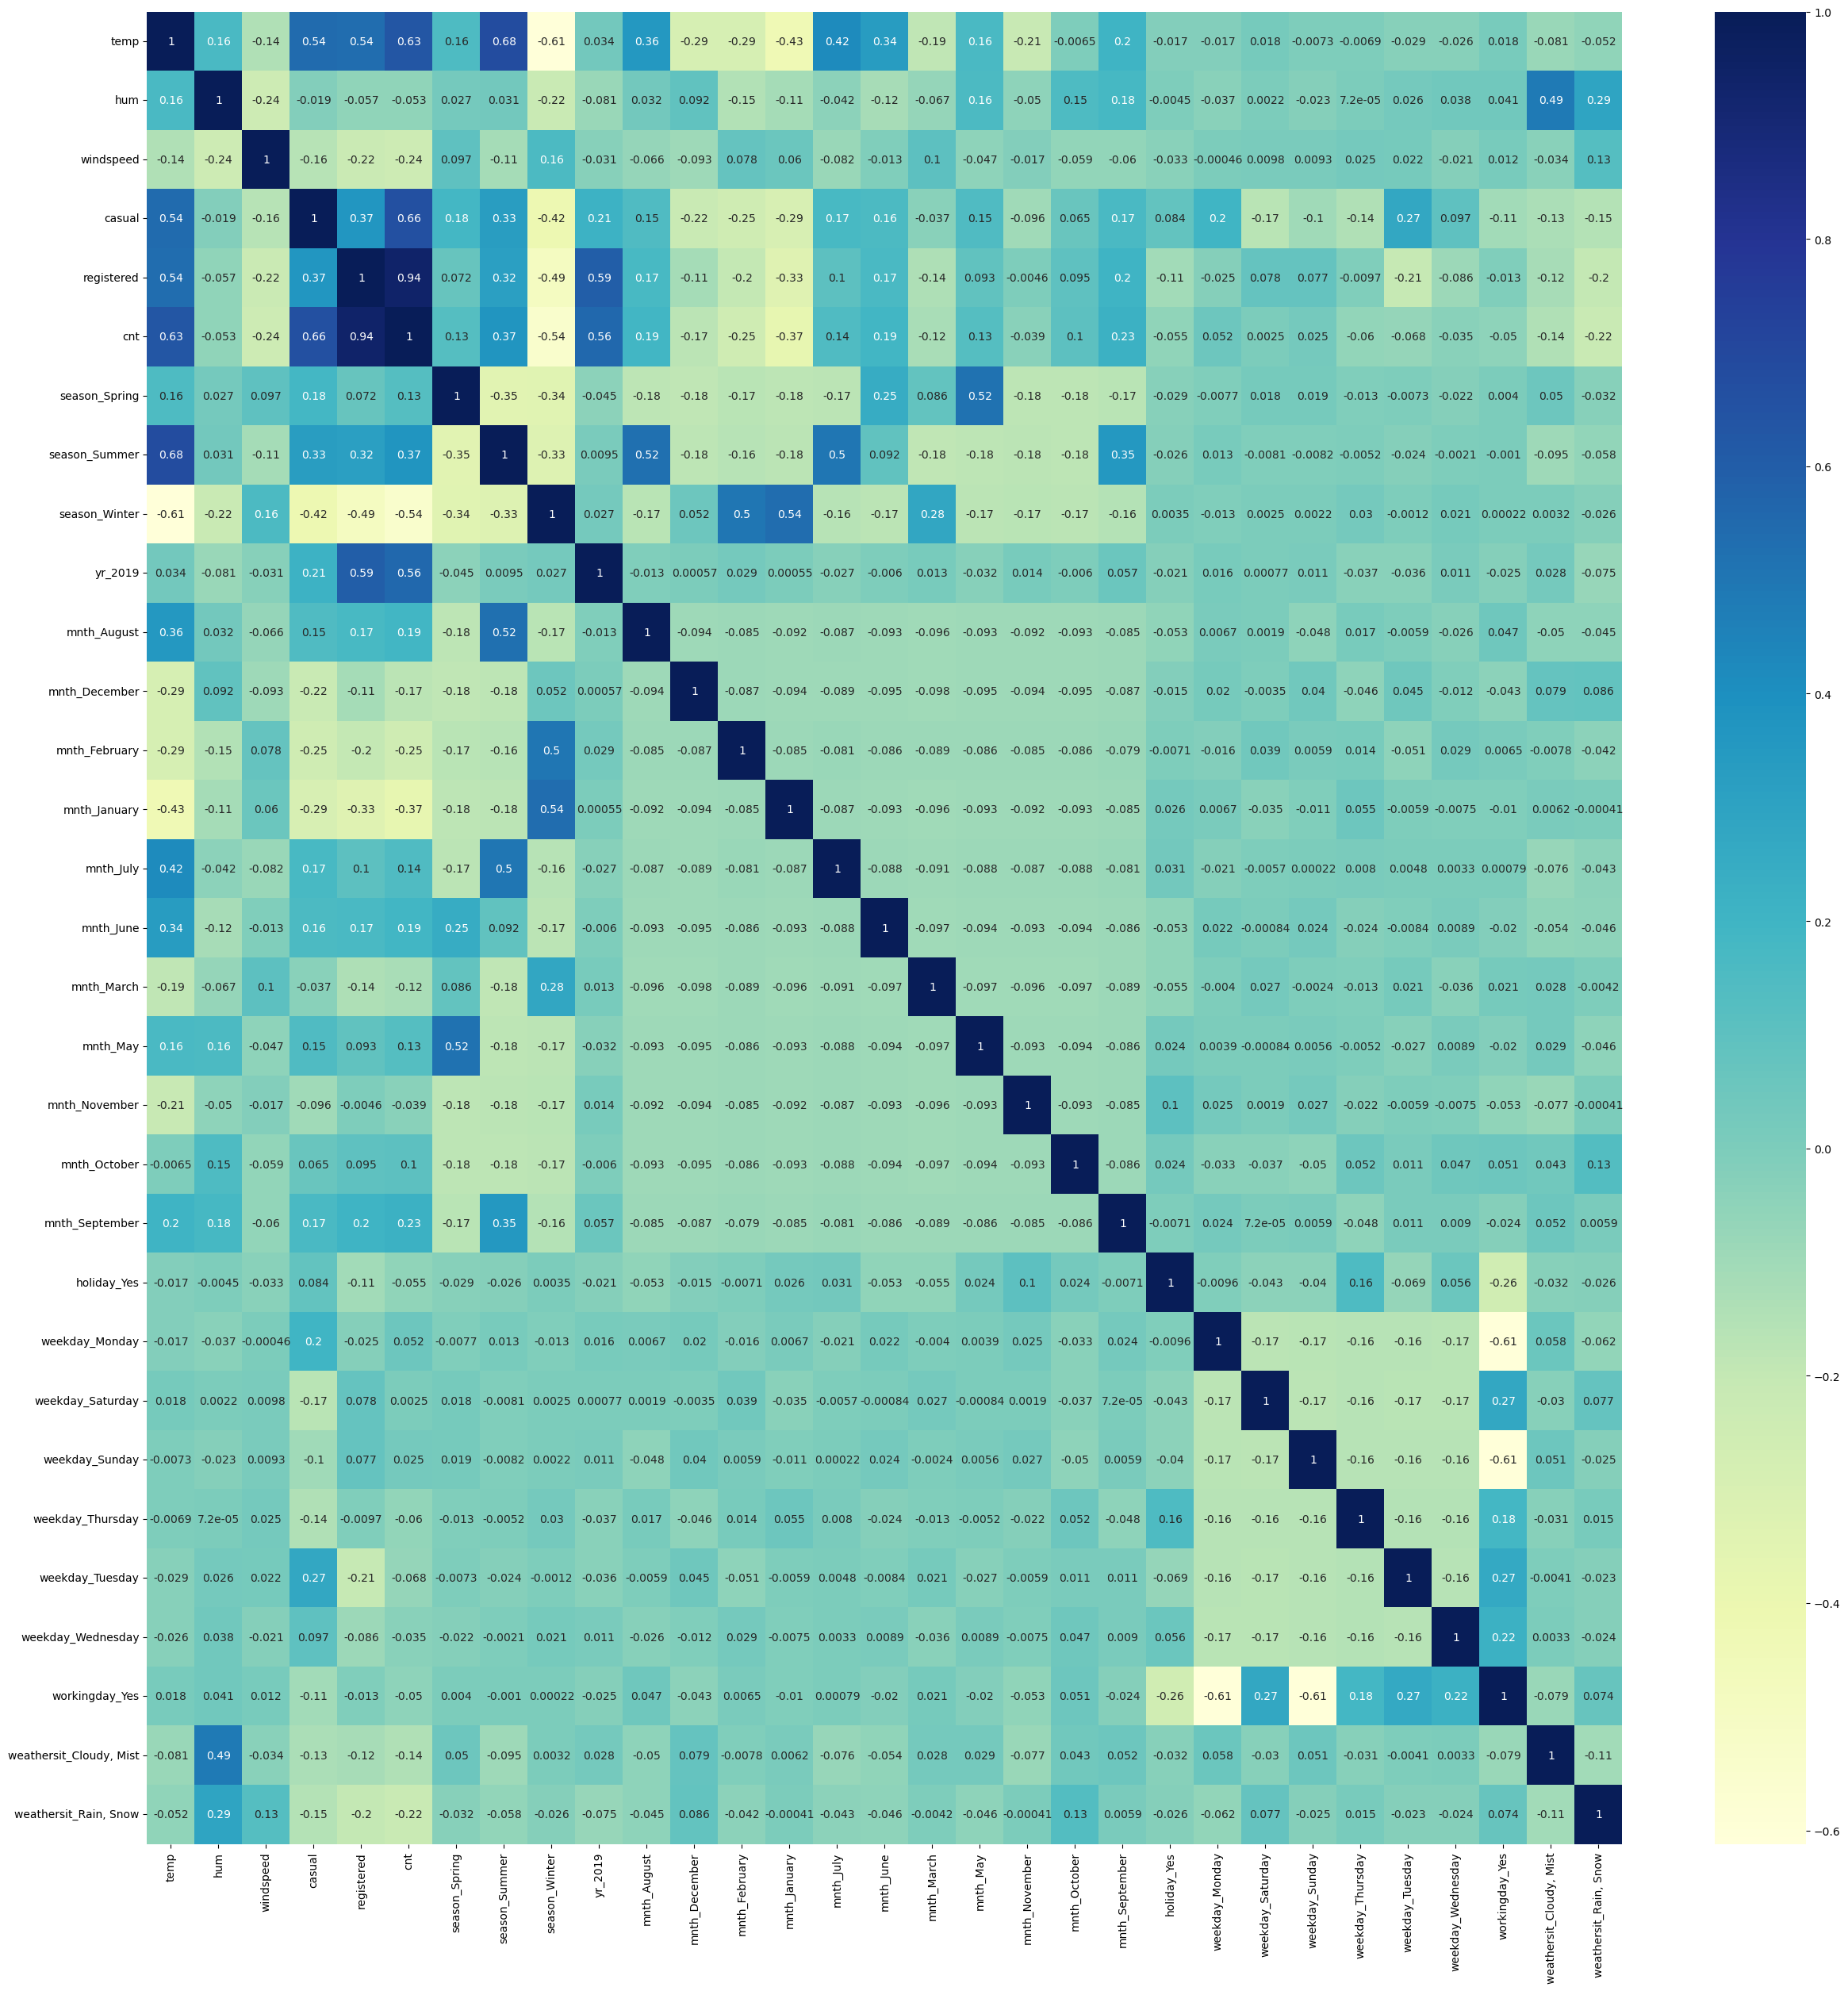

In [60]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")

In [61]:
X_train = df_train.drop(['casual', 'registered','cnt'], axis = 1)
y_train = df_train.pop('cnt')

In [62]:
X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,mnth_February,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
452,0.519699,0.257541,0.694652,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
337,0.306231,0.726218,0.104329,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
509,0.762572,0.686194,0.246070,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
77,0.491382,0.174014,0.816169,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
451,0.506630,0.316125,0.624574,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# np.array(X_train)

In [64]:
import statsmodels.api as sm

In [65]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [66]:
lr.params

const                      0.503749
temp                       0.426728
hum                       -0.144099
windspeed                 -0.139393
season_Spring             -0.066843
season_Summer             -0.065806
season_Winter             -0.163051
yr_2019                    0.220533
mnth_August               -0.023513
mnth_December             -0.054911
mnth_February             -0.042834
mnth_January              -0.055901
mnth_July                 -0.080046
mnth_June                 -0.027526
mnth_March                 0.006560
mnth_May                   0.025580
mnth_November             -0.063175
mnth_October               0.006629
mnth_September             0.048640
holiday_Yes               -0.110306
weekday_Monday            -0.053313
weekday_Saturday          -0.005033
weekday_Sunday            -0.061225
weekday_Thursday          -0.017516
weekday_Tuesday           -0.027321
weekday_Wednesday         -0.019409
workingday_Yes            -0.070437
weathersit_Cloudy, Mist   -0

In [67]:
lm = LinearRegression()

In [68]:
lm.fit(X_train, y_train)

LinearRegression()

In [69]:
lm.coef_

array([ 0.42672837, -0.14409906, -0.13939323, -0.06684324, -0.06580573,
       -0.16305055,  0.22053289, -0.02351282, -0.05491069, -0.04283372,
       -0.05590064, -0.08004571, -0.0275261 ,  0.00655971,  0.02557984,
       -0.06317455,  0.00662855,  0.04864005, -0.11030587, -0.05331311,
       -0.00503338, -0.06122522, -0.01751598, -0.02732121, -0.01940887,
       -0.07043733, -0.04505683, -0.19494867])

In [70]:
lm.intercept_

0.5037487723788281

In [71]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     94.16
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          3.23e-183
Time:                        18:05:49   Log-Likelihood:                 560.32
No. Observations:                 547   AIC:                            -1063.
Df Residuals:                     518   BIC:                            -937.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5037      0.074      6.804      0.000       0.358       0.649
temp                        0.4267      0.043      9.882      0.000       0.342       0.512
hum                        -0.1441      0.030     -4.848      0.000      -0.202      -0.086
windspeed                  -0.1394      0.022     -6.354      0.000      -0.182      -0.096
season_Spring              -0.0668      0.029     -2.299      0.022      -0.124      -0.010
season_Summer              -0.0658      0.028     -2.318      0.021      -0.122      -0.010
season_Winter              -0.1631      0.025     -6.552      0.000      -0.212      -0.114
yr_2019                     0.2205      0.008     27.952      0.000       0.205       0.236
mnth_August                -0.0235      0.032     -0.736      0.462      -0.086       0.039
mnth_December              -0.0549      0.033     -1.679      0.094      -0.119       0.009
mnth_February              -0.0428      0.032     -1.356      0.176      -0.105       0.019
mnth_January               -0.0559      0.033     -1.714      0.087      -0.120       0.008
mnth_July                  -0.0800      0.033     -2.404      0.017      -0.145      -0.015
mnth_June                  -0.0275      0.024     -1.159      0.247      -0.074       0.019
mnth_March                  0.0066      0.024      0.276      0.783      -0.040       0.053
mnth_May                    0.0256      0.020      1.290      0.198      -0.013       0.065
mnth_November              -0.0632      0.035     -1.782      0.075      -0.133       0.006
mnth_October                0.0066      0.035      0.191      0.848      -0.061       0.075
mnth_September              0.0486      0.030      1.609      0.108      -0.011       0.108
holiday_Yes                -0.1103      0.053     -2.074      0.039      -0.215      -0.006
weekday_Monday             -0.0533      0.060     -0.895      0.371      -0.170       0.064
weekday_Saturday           -0.0050      0.014     -0.362      0.718      -0.032       0.022
weekday_Sunday             -0.0612      0.060     -1.018      0.309      -0.179       0.057
weekday_Thursday           -0.0175      0.015     -1.205      0.229      -0.046       0.011
weekday_Tuesday            -0.0273      0.014     -1.900      0.058      -0.056       0.001
weekday_Wednesday          -0.0194      0.014     -1.350      0.178      -0.048       0.009
workingday_Yes             -0.0704      0.059     -1.190      0.235      -0.187       0.046
weathersit_Cloudy, Mist    -0.0451      0.010     -4.304      0.000      -0.066      -0.024
weathersit_Rain, Snow      -0.1949      0.031     -6.359      0.000      -0.255      -0.135
==============================================================================
Omnibus:                      101.661   Durbin-Watson:      

In [72]:
# Import RFE
from sklearn.feature_selection import RFE

In [73]:
lm = LinearRegression()
rfe1 = RFE(lm,  step = 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True False False False  True  True
 False False False  True False False  True False False  True False False
 False  True False  True]
[1 1 1 1 1 1 1 2 2 2 1 1 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 1]


In [74]:
col1 = X_train.columns[rfe1.support_]

In [75]:
col1

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_January', 'mnth_July',
       'mnth_November', 'holiday_Yes', 'weekday_Sunday', 'workingday_Yes',
       'weathersit_Rain, Snow'],
      dtype='object')

In [76]:
X_train_rfe1 = X_train[col1]

X_train_rfe1 = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     167.2
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          2.43e-184
Time:                        18:05:49   Log-Likelihood:                 527.42
No. Observations:                 547   AIC:                            -1025.
Df Residuals:                     532   BIC:                            -960.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4223      0.026     16.535      0.000       0.372       0.473
temp                      0.4765      0.032     14.785      0.000       0.413       0.540
hum                      -0.1958      0.024     -8.297      0.000      -0.242      -0.149
windspeed                -0.1469      0.022     -6.581      0.000      -0.191      -0.103
season_Spring            -0.0542      0.014     -3.924      0.000      -0.081      -0.027
season_Summer            -0.0609      0.017     -3.485      0.001      -0.095      -0.027
season_Winter            -0.1701      0.015    -10.992      0.000      -0.201      -0.140
yr_2019                   0.2200      0.008     27.121      0.000       0.204       0.236
mnth_January             -0.0233      0.018     -1.328      0.185      -0.058       0.011
mnth_July                -0.0850      0.018     -4.798      0.000      -0.120      -0.050
mnth_November            -0.0397      0.018     -2.253      0.025      -0.074      -0.005
holiday_Yes              -0.0682      0.026     -2.660      0.008      -0.119      -0.018
weekday_Sunday           -0.0094      0.015     -0.628      0.530      -0.039       0.020
workingday_Yes           -0.0257      0.012     -2.199      0.028      -0.049      -0.003
weathersit_Rain, Snow    -0.1514      0.030     -5.115      0.000      -0.210      -0.093
==============================================================================
Omnibus:                       73.826   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.435
Skew:                          -0.746   Prob(JB):                     2.39e-35
Kurtosis:                       5.184   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
a = X_train_rfe1.drop('const', axis = 1)

In [79]:
a

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_January,mnth_July,mnth_November,holiday_Yes,weekday_Sunday,workingday_Yes,"weathersit_Rain, Snow"
452,0.519699,0.257541,0.694652,1,0,0,1,0,0,0,0,0,1,0
337,0.306231,0.726218,0.104329,0,0,0,0,0,0,0,0,0,1,0
509,0.762572,0.686194,0.246070,1,0,0,1,0,0,0,0,1,0,0
77,0.491382,0.174014,0.816169,0,0,1,0,0,0,0,0,0,1,0
451,0.506630,0.316125,0.624574,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.375936,0.906613,0.289714,0,0,0,1,0,0,0,0,0,1,0
192,0.911781,0.424594,0.395608,0,1,0,0,0,1,0,0,0,1,0
629,0.723364,0.546404,0.604317,0,1,0,1,0,0,0,0,0,0,0
559,0.793067,0.619490,0.253907,0,1,0,1,0,1,0,0,0,0,0


In [80]:
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,temp,16.20
1,hum,7.44
12,workingday_Yes,5.14
4,season_Summer,4.80
2,windspeed,4.56
3,season_Spring,3.05
5,season_Winter,2.89
6,yr_2019,1.99
11,weekday_Sunday,1.84
7,mnth_January,1.60


In [81]:
lm = LinearRegression()
rfe2 = RFE(lm, step = 7)

rfe2.fit(a, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True False False  True  True False  True False False False
 False  True]
[1 1 1 2 2 1 1 2 1 2 2 2 2 1]


In [82]:
col2 = a.columns[rfe2.support_]
col2

X_train_rfe2 = a[col2]

X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     316.3
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          2.91e-186
Time:                        18:05:49   Log-Likelihood:                 512.21
No. Observations:                 547   AIC:                            -1008.
Df Residuals:                     539   BIC:                            -974.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3820      0.022     17.562      0.000       0.339       0.425
temp                      0.4297      0.024     18.099      0.000       0.383       0.476
hum                      -0.1831      0.024     -7.689      0.000      -0.230      -0.136
windspeed                -0.1574      0.022     -7.007      0.000      -0.201      -0.113
season_Winter            -0.1498      0.012    -12.164      0.000      -0.174      -0.126
yr_2019                   0.2230      0.008     27.021      0.000       0.207       0.239
mnth_July                -0.0915      0.017     -5.322      0.000      -0.125      -0.058
weathersit_Rain, Snow    -0.1443      0.030     -4.801      0.000      -0.203      -0.085
==============================================================================
Omnibus:                       55.648   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.322
Skew:                          -0.592   Prob(JB):                     1.50e-25
Kurtosis:                       4.901   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
b = X_train_rfe2.drop('const', axis = 1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = 'VIF', ascending = False)
vif1

,features,VIF
0,temp,7.70
1,hum,6.16
2,windspeed,3.83
4,yr_2019,1.95
3,season_Winter,1.70
5,mnth_July,1.35
6,"weathersit_Rain, Snow",1.15


In [84]:
y_train_cnt = lm2.predict(X_train_rfe2)

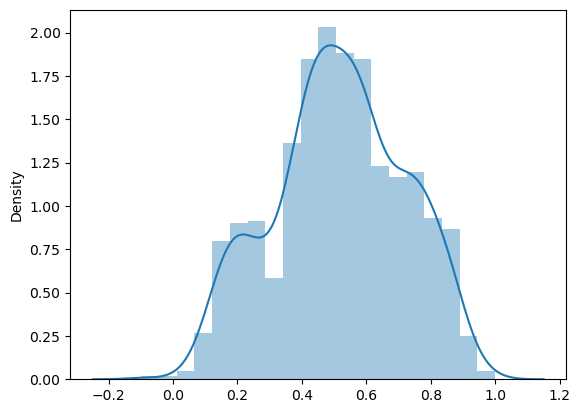

In [85]:
y_train_cnt = lm2.predict(X_train_rfe2)
sns.distplot((y_train, y_train_cnt), bins = 20)
plt.show()

In [86]:
df_test[var] = scaler.transform(df_test[var])

In [87]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(["casual", "registered"], axis = 1)

In [88]:
x_test.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,mnth_February,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
196,0.771285,0.460557,0.415865,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
187,0.854058,0.552784,0.292782,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0.178804,0.340487,0.289684,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
31,0.125012,0.801018,0.027323,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
390,0.320391,0.717517,0.077873,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [90]:
c = X_train_rfe2.drop('const', axis = 1)

In [91]:
col2 = c.columns

In [93]:
x_test_rfe2 = x_test[col2]

In [94]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [95]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 196 to 35
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  183 non-null    float64
 1   temp                   183 non-null    float64
 2   hum                    183 non-null    float64
 3   windspeed              183 non-null    float64
 4   season_Winter          183 non-null    uint8  
 5   yr_2019                183 non-null    uint8  
 6   mnth_July              183 non-null    uint8  
 7   weathersit_Rain, Snow  183 non-null    uint8  
dtypes: float64(4), uint8(4)
memory usage: 7.9 KB


In [96]:
y_test_pred = lm2.predict(x_test_rfe2)

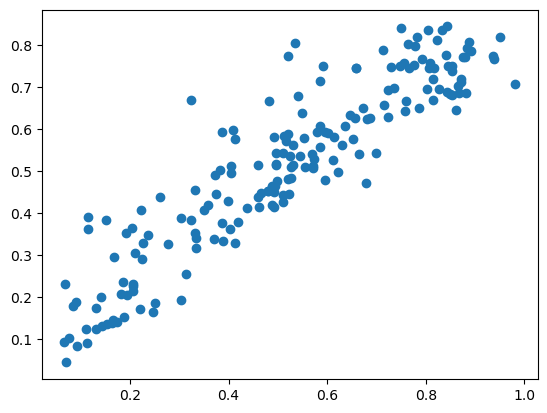

In [98]:
plt.figure()
plt.scatter(y_test, y_test_pred)

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8264670385963993

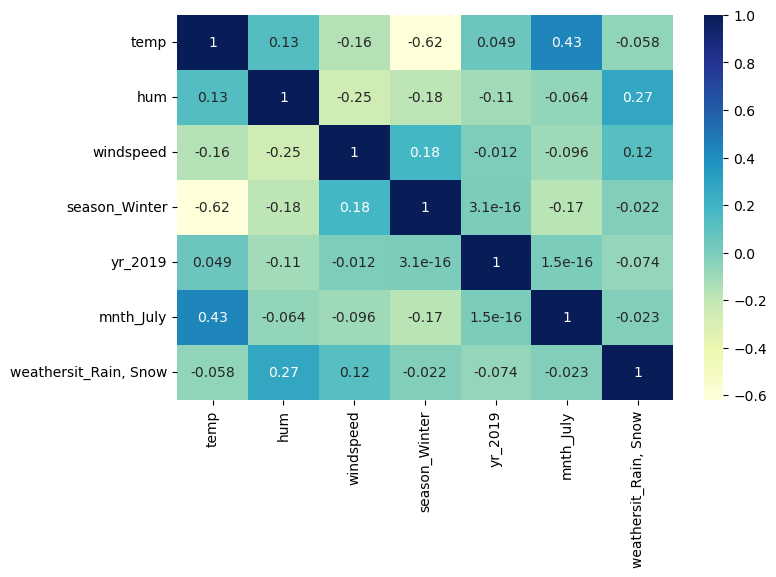

In [102]:
plt.figure(figsize = (8,5))

sns.heatmap(dataset[col2].corr(), cmap = 'YlGnBu', annot = True)
plt.show()